**EXL EQ 2021: Business Case Challenge**

**TEAM (2+2=5)**
1. Sinjini Roy
2. Aditya Shenoy 

**Problem Statement**: 
A tool for a US public health client is required to develop to predict daily Covid-19 cases at a county level.

**Solution**:
1. Used XGBoost Regressor Model for optimal performance to predict the number of daily new Covid-19 cases.
2. Analysed the data using fbprophet for time series forecasting.

**TIME SERIES FORECASTING USING FBPROPHET | NUMBER OF COVID-19 CASES**

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
import datetime 
import warnings
warnings.filterwarnings('ignore')

**READING THE DATA**

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
train.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,...,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,101.51,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,12.1,15.9,14.4,58233.0,55514.0,...,21383.0,22185.0,0.2364,0.18,0.0257,26127.0,25513.0,2.4,NaN,NaN,NaN,NaN,116.0,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.12,NaN,94.32,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,10.1,13.5,13.3,59871.0,190790.0,...,81423.0,85193.0,0.1679,0.10,0.0458,95993.0,93689.0,2.4,NaN,NaN,NaN,NaN,269.0,-17.0,-495.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,27.1,41.0,39.5,35972.0,27201.0,...,7397.0,6338.0,0.5355,0.47,0.0509,8624.0,8349.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,20.3,25.9,25.2,47918.0,22597.0,...,8903.0,8326.0,0.2545,0.22,0.0204

In [ ]:
train.tail()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,...,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
1179370,56037,56,2021-01-30,3472,32,NaN,NaN,NaN,NaN,NaN,NaN,161.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634985,109715,1509,8731,8.3,10.1,8.2,80639.0,45267.0,...,22314.0,20480.0,0.2022,0.02,0.1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,6.0,29.0,1734.0,31.0,8.0,163.0,0.0,0.0,51.0,31.0,15.0,14.0,62.0,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179371,56039,56,2021-01-30,3078,6,NaN,NaN,NaN,NaN,NaN,NaN,171.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634985,109715,1509,8731,6.0,5.7,4.7,98837.0,21675.0,...,10841.0,9813.0,0.1918,0.01,0.1560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,6.0,29.0,1734.0,31.0,8.0,163.0,0.0,0.0,51.0,31.0,15.0,14.0,62.0,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179372,56041,56,2021-01-30,1960,12,NaN,NaN,NaN,NaN,NaN,NaN,148.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634985,109715,1509,8731,8.5,9.6,7.8,70756.0,21025.0,...,10212.0,9980.0,0.1220,0.01,0.0906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,6.0,29.0,1734.0,31.0,8.0,163.0,0.0,0.0,51.0,31.0,15.0,14.0,62.0,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179373,56043,56,2021-01-30,864,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634985,109715,1509,8731,11.1,13.9,12.3,55122.0,8464.0,...,4060.0,4009.0,0.1699,0.00,0.1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.

In [ ]:
train.shape

(1179375, 82)

**FORECASTING THE NUMBER OF COVID-19 CASES**

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed=train.groupby('date').sum()['confirmed_cases'].reset_index()

In [ ]:
confirmed

,date,confirmed_cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
370,2021-01-26,24898024
371,2021-01-27,25052330
372,2021-01-28,25204611
373,2021-01-29,25368551


In [ ]:
confirmed.columns=['ds','y']

In [ ]:
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [ ]:
model=Prophet(interval_width=0.95)

In [ ]:
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=7)

In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
377,2021-02-02
378,2021-02-03
379,2021-02-04
380,2021-02-05


**MODEL VALIDATION | FUTURE PREDICTED VALUES | NUMBER OF CONFIRMED CASES**

In [ ]:
pred=model.predict(future)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-4.413575e+03,-1.769195e+05,1.643046e+05,-4.413575e+03,-4.413575e+03,-3081.020965,-3081.020965,-3081.020965,-3081.020965,-3081.020965,-3081.020965,0.0,0.0,0.0,-7.494596e+03
1,2020-01-23,-4.259408e+03,-1.743673e+05,1.713845e+05,-4.259408e+03,-4.259408e+03,532.638387,532.638387,532.638387,532.638387,532.638387,532.638387,0.0,0.0,0.0,-3.726770e+03
2,2020-01-24,-4.105241e+03,-1.715848e+05,1.777982e+05,-4.105241e+03,-4.105241e+03,4306.224737,4306.224737,4306.224737,4306.224737,4306.224737,4306.224737,0.0,0.0,0.0,2.009842e+02
3,2020-01-25,-3.951073e+03,-1.643956e+05,1.700764e+05,-3.951073e+03,-3.951073e+03,5827.281189,5827.281189,5827.281189,5827.281189,5827.281189,5827.281189,0.0,0.0,0.0,1.876208e+03
4,2020-01-26,-3.796906e+03,-1.675842e+05,1.662426e+05,-3.796906e+03,-3.796906e+03,305.739622,305.739622,305.739622,305.739622,305.739622,305.739622,0.0,0.0,0.0,-3.491166e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2021-02-02,2.636855e+07,2.618707e+07,2.652828e+07,2.635034e+07,2.638605e+07,-5545.028355,-5545.028355,-5545.028355,-5545.028355,-5545.028355,-5545.028355,0.0,0.0,0.0,2.636300e+07
378,2021-02-03,2.656989e+07,2.639804e+07,2.674046e+07,2.653784e+07,2.660196e+07,-3081.020965,-3081.020965,-3081.020965,-3081.020965,-3081.020965,-3081.020965,0.0,0.0,0.0,2.656681e+07
379,2021-02-04,2.677124e+07,2.659712e+07,2.694821e+07,2.672070e+07,2.682068e+07,532.638387,532.638387,532.638387,532.638387,532.638387,532.638387,0.0,0.0,0.0,2.677177e+07
380,2021-02-05,2.697259e+07,2.680188e+07,2.715525e+07,2.690287e+07,2.703753e+07,4306.224737,4306.224737,4306.224737,4306.224737,4306.224737,4306.224737,0.0,0.0,0.0,2.697689e+07


In [ ]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
377,2021-02-02,2.636300e+07,2.618707e+07,2.652828e+07
378,2021-02-03,2.656681e+07,2.639804e+07,2.674046e+07
379,2021-02-04,2.677177e+07,2.659712e+07,2.694821e+07
380,2021-02-05,2.697689e+07,2.680188e+07,2.715525e+07
381,2021-02-06,2.717976e+07,2.698514e+07,2.737198e+07


**PLOTTING OF DATA TO DETERMINE COVID-19 TRENDS | NUMBER OF CONFIRMED CASES**

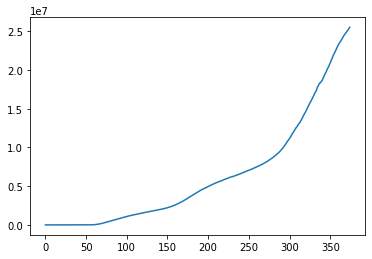

In [ ]:
confirmed['y'].plot()

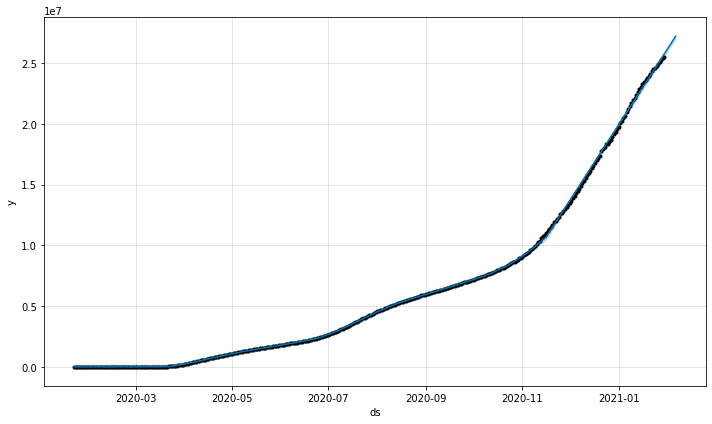

In [ ]:
confirmed_forecast=model.plot(pred)

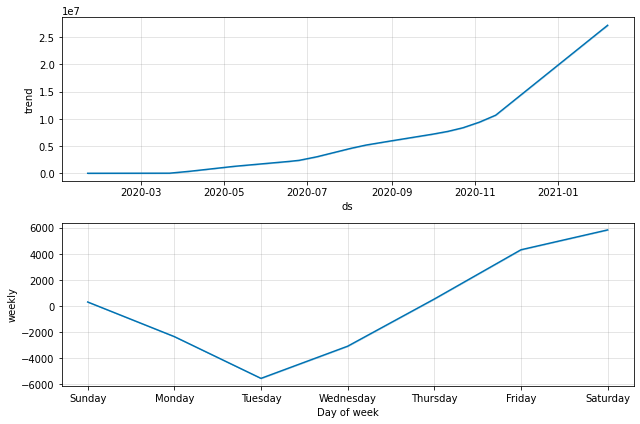

In [ ]:
confirmed_forecast_plot=model.plot_components(pred)

In [ ]:
death=train.groupby('date').sum()['deaths'].reset_index()

In [ ]:
death

,date,deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
370,2021-01-26,415144
371,2021-01-27,419150
372,2021-01-28,423048
373,2021-01-29,426673


In [ ]:
death.columns=['ds','y']

In [ ]:
death['ds']=pd.to_datetime(death['ds'])

In [ ]:
m=Prophet(interval_width=0.95)

In [ ]:
m.fit(death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=7)

In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
377,2021-02-02
378,2021-02-03
379,2021-02-04
380,2021-02-05


**MODEL VALIDATION | FUTURE PREDICTED VALUES | NUMBER OF DEATHS**

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-42.703949,-5671.286213,5476.258501,-42.703949,-42.703949,20.304536,20.304536,20.304536,20.304536,20.304536,20.304536,0.0,0.0,0.0,-22.399413
1,2020-01-23,-44.914661,-5105.783248,6255.565939,-44.914661,-44.914661,282.739342,282.739342,282.739342,282.739342,282.739342,282.739342,0.0,0.0,0.0,237.824681
2,2020-01-24,-47.125374,-5380.861967,6113.963889,-47.125374,-47.125374,439.216707,439.216707,439.216707,439.216707,439.216707,439.216707,0.0,0.0,0.0,392.091333
3,2020-01-25,-49.336087,-5339.780453,6170.785820,-49.336087,-49.336087,418.992320,418.992320,418.992320,418.992320,418.992320,418.992320,0.0,0.0,0.0,369.656233
4,2020-01-26,-51.546799,-6105.740879,5757.712021,-51.546799,-51.546799,-221.855328,-221.855328,-221.855328,-221.855328,-221.855328,-221.855328,0.0,0.0,0.0,-273.402127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2021-02-02,423741.131351,418199.776478,429386.659309,423269.559543,424163.205280,-351.143832,-351.143832,-351.143832,-351.143832,-351.143832,-351.143832,0.0,0.0,0.0,423389.987519
378,2021-02-03,426175.507990,420715.297210,432061.026485,425426.015464,426867.146240,20.304536,20.304536,20.304536,20.304536,20.304536,20.304536,0.0,0.0,0.0,426195.812526
379,2021-02-04,428609.884629,422622.676140,434799.732208,427502.205967,429786.452778,282.739342,282.739342,282.739342,282.739342,282.739342,282.739342,0.0,0.0,0.0,428892.623971
380,2021-02-05,431044.261268,425281.611087,437694.726176,429585.447321,432611.300671,439.216707,439.216707,439.216707,439.216707,439.216707,439.216707,0.0,0.0,0.0,431483.477975


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
377,2021-02-02,423389.987519,418199.776478,429386.659309
378,2021-02-03,426195.812526,420715.297210,432061.026485
379,2021-02-04,428892.623971,422622.676140,434799.732208
380,2021-02-05,431483.477975,425281.611087,437694.726176
381,2021-02-06,433897.630226,428026.716071,439972.857602


**PLOTTING OF DATA TO DETERMINE COVID-19 TRENDS | NUMBER OF DEATHS**

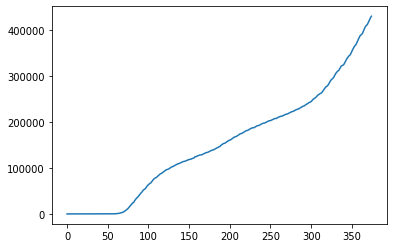

In [ ]:
death['y'].plot()

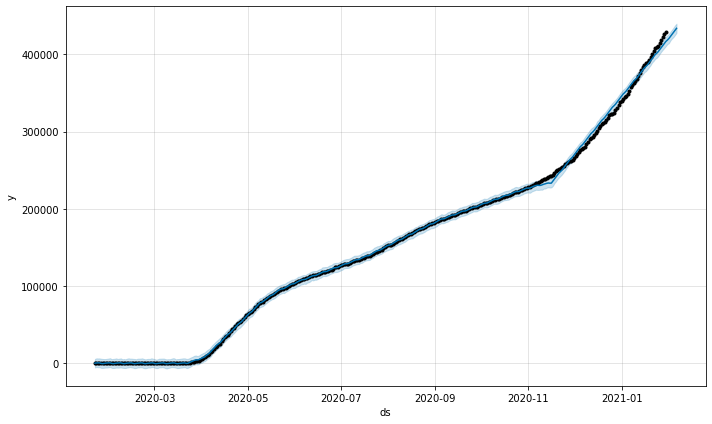

In [ ]:
death_forecast=m.plot(forecast)

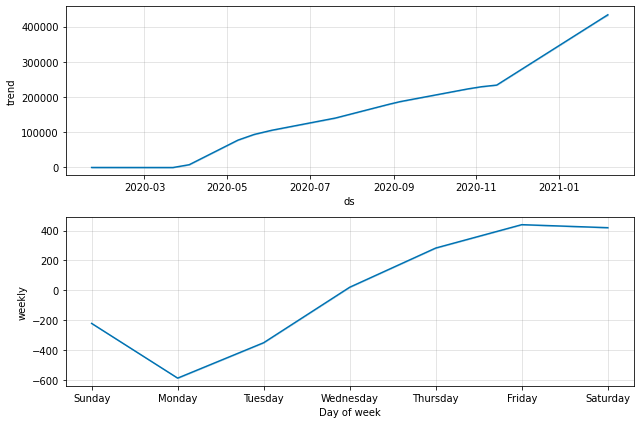

In [ ]:
death_forecastplot=m.plot_components(forecast)